<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SoftBank Stock data from Stooq.com
# reference https://seanmemo.com/234/

from pandas_datareader import data
start = '2023-04-01'
end = '2023-04-25'
#6501：日立製作所
df = data.DataReader('6501.JP', 'stooq', start, end)


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-25,7765,7799,7667,7717,2172400
2023-04-24,7804,7871,7774,7776,2609900
2023-04-21,7689,7777,7677,7728,3456600
2023-04-20,7695,7713,7622,7683,2014400
2023-04-19,7641,7689,7620,7652,2089100
2023-04-18,7550,7629,7528,7594,2890100
2023-04-17,7530,7563,7457,7500,2904600
2023-04-14,7377,7414,7324,7407,2777800
2023-04-13,7360,7365,7294,7305,2300300


<Axes: xlabel='Date'>

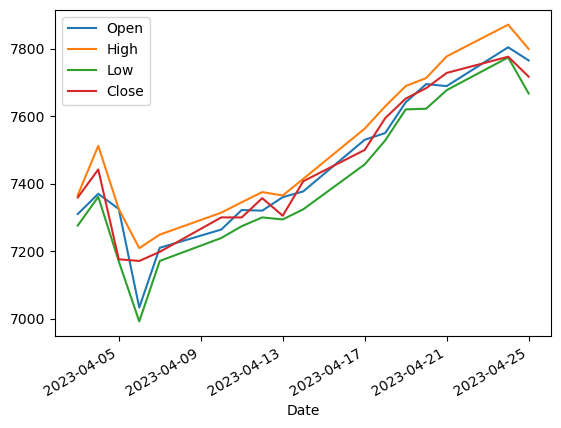

In [9]:

df.plot()

In [15]:
#https://dev.classmethod.jp/articles/pandas_datareader-mplfinance-tech/
#データのグラフ化

import mplfinance as mpf

df = df.sort_index()
mpf.plot(df, title='\nSoftBank()', type='candle', mav=(5, 25), volume=True, savefig='6501_JP.png')

In [31]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)
    
# トップレベルウィンドウ作成
root = tk.Tk()

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=0, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=1, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=2, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=0, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=1, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=2, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=3, column=1, padx=10, pady=5)


root.mainloop()

In [33]:
#コードと銘柄名のテーブルのダウンロード
import requests
url = "https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls"
r = requests.get(url)
with open('data_j.xls', 'wb') as output:
    output.write(r.content)

,コード,銘柄名,33業種コード,33業種区分,規模コード,規模区分


In [46]:
#コードと銘柄名のみを保存
import pandas as pd
stocklist = pd.read_excel("./data_j.xls")
stocklist = stocklist.loc[:,['コード', '銘柄名']]
stocklist.to_csv("stocklist.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.nikkei.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('a', class_='k-card__title')
for article in articles:
    print(article.text.strip())

In [13]:
import dash
import dash_core_components as dcc
from dash import html
import plotly.express as px
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import pandas_datareader as pdr

import seaborn as sns

sns.set(font=['Yu Gothic'])
# データ読み込み
df_pf = pd.read_csv('portfolio.csv', encoding='shift_jis', index_col=0)
df_pf

EmptyDataError: No columns to parse from file

In [12]:
import pandas
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)
print(df)


      Unnamed: 0   コード                                   銘柄名
0              0  1301                                    極洋
1              1  1305                         ダイワ上場投信－トピックス
2              2  1306               ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信
3              3  1308                     上場インデックスファンドＴＯＰＩＸ
4              4  1309  ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...          ...   ...                                   ...
4248        4248  9993                                  ヤマザワ
4249        4249  9994                                   やまや
4250        4250  9995                                 グローセル
4251        4251  9996                                 サトー商会
4252        4252  9997                                  ベルーナ

[4253 rows x 3 columns]


In [16]:
df_part = df[df['銘柄名'].str.contains('日立')]
print(df_part)
print(df_part['コード'].astype(str))
print(df_part['銘柄名'].astype(str))

      Unnamed: 0   コード    銘柄名
2445        2445  6305   日立建機
2573        2573  6501  日立製作所
2859        2859  7004   日立造船
2445    6305
2573    6501
2859    7004
Name: コード, dtype: object
2445     日立建機
2573    日立製作所
2859     日立造船
Name: 銘柄名, dtype: object


In [30]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)
    
    

# トップレベルウィンドウ作成
root2 = tk.Toplevel()
root2.title("search")
root2.geometry("300x200")

name_label = ttk.Label(
    root2,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root2,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root2)
get.set("GET!")
get_button = tk.Button(root2, textvariable=get, command=search_table)
get_button.grid(row=3, column=1, padx=10, pady=5)

root2.mainloop()

In [ ]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)

def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)

# トップレベルウィンドウ作成
root = tk.Tk()


name_label = ttk.Label(
    root,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root)
get.set("GET!")
get_button = tk.Button(root, textvariable=get, command=search_table)
get_button.grid(row=0, column=3, padx=10, pady=5)
    

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=1, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=2, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=3, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=1, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=2, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=3, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=3, column=1, padx=10, pady=5)


root.mainloop()


